In [27]:
print("Rahman Aziz Firmansyah")

Rahman Aziz Firmansyah


In [28]:
import pandas as pd
import numpy as np
import scipy.stats as st
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder, StandardScaler, MinMaxScaler, RobustScaler, MaxAbsScaler, OneHotEncoder
from sklearn.feature_selection import mutual_info_classif, SelectKBest, VarianceThreshold
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, recall_score, precision_score, precision_recall_curve, roc_auc_score, roc_curve
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeClassifier, plot_tree
from scipy.stats import spearmanr
import seaborn as sns
import matplotlib.pyplot as plt
import itertools

In [29]:
rating = pd.read_csv('rating_olshop.csv').drop('Unnamed: 0', axis=1).drop(['order_status', 'order_purchase_timestamp', 
'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 
'order_estimated_delivery_date', 'shipping_limit_date', 'order_item_id'], axis = 1)
rating.head()

,customer_city,customer_state,geolocation_city,geolocation_state,payment_type,product_category_name,seller_city,seller_state,product_category_name_english,geolocation_lat,...,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,label,delivered_est_difference,delivered_purchase_difference
0,rio de janeiro,RJ,rio de janeiro,RJ,credit_card,moveis_decoracao,other,other,furniture_decor,-22.927008,...,23.0,922.0,1.0,850.0,16.0,19.0,15.0,0,12,9
1,rio de janeiro,RJ,rio de janeiro,RJ,credit_card,other,other,SP,other,-22.987642,...,33.0,523.0,3.0,584.0,16.0,11.0,13.0,1,22,12
2,rio de janeiro,RJ,rio de janeiro,RJ,credit_card,other,sao paulo,SP,other,-22.903826,...,54.0,629.0,1.0,1050.0,36.0,24.0,22.0,1,16,14
3,rio de janeiro,RJ,rio de janeiro,RJ,credit_card,other,other,SP,other,-22.881837,...,30.0,690.0,2.0,500.0,25.0,9.0,18.0,1,20,11
4,other,other,other,other,boleto,other,other,SP,other,-8.982786,...,35.0,534.0,2.0,200.0,20.0,10.0,20.0,1,22,20


In [30]:
# memisahkan variabel input dan output
X = rating.drop('label', axis=1)
y = rating['label']

### Handling Missing Value

In [31]:
simple_imp_median = SimpleImputer(strategy='median')
simple_imp_mode = SimpleImputer(strategy='most_frequent')

for column in X.select_dtypes('number').columns:
    X[column] = simple_imp_median.fit_transform(X[[column]])
for columns in X.select_dtypes('object').columns:
    X[column] = simple_imp_mode.fit_transform(X[[column]])

In [32]:
X.isna().sum()

customer_city                    0
customer_state                   0
geolocation_city                 0
geolocation_state                0
payment_type                     1
product_category_name            0
seller_city                      0
seller_state                     0
product_category_name_english    0
geolocation_lat                  0
geolocation_lng                  0
price                            0
freight_value                    0
payment_sequential               0
payment_installments             0
payment_value                    0
product_name_lenght              0
product_description_lenght       0
product_photos_qty               0
product_weight_g                 0
product_length_cm                0
product_height_cm                0
product_width_cm                 0
delivered_est_difference         0
delivered_purchase_difference    0
dtype: int64

In [33]:
X['payment_type'] = simple_imp_mode.fit_transform(X[['payment_type']])

In [34]:
X.isna().sum()

customer_city                    0
customer_state                   0
geolocation_city                 0
geolocation_state                0
payment_type                     0
product_category_name            0
seller_city                      0
seller_state                     0
product_category_name_english    0
geolocation_lat                  0
geolocation_lng                  0
price                            0
freight_value                    0
payment_sequential               0
payment_installments             0
payment_value                    0
product_name_lenght              0
product_description_lenght       0
product_photos_qty               0
product_weight_g                 0
product_length_cm                0
product_height_cm                0
product_width_cm                 0
delivered_est_difference         0
delivered_purchase_difference    0
dtype: int64

### Feature Engineering

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

In [36]:
# memisahkan variabel numerik dan kategorik pada X_train
X_train_num = X_train.select_dtypes('number')
X_train_obj = X_train.select_dtypes('object')

#### Encoding untuk Fitur-Fitur Kategorik

In [37]:
ohe = OneHotEncoder(handle_unknown='ignore')
X_train_obj_encoded = pd.DataFrame(ohe.fit_transform(X_train_obj).toarray(), columns=ohe.get_feature_names_out(X_train_obj.columns))
X_train_obj_encoded.head()

,customer_city_belo horizonte,customer_city_curitiba,customer_city_niteroi,customer_city_other,customer_city_rio de janeiro,customer_city_sao paulo,customer_state_MG,customer_state_PR,customer_state_RJ,customer_state_RS,...,seller_state_RJ,seller_state_SC,seller_state_SP,seller_state_other,product_category_name_english_bed_bath_table,product_category_name_english_computers_accessories,product_category_name_english_furniture_decor,product_category_name_english_health_beauty,product_category_name_english_other,product_category_name_english_sports_leisure
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


#### Scaling untuk Fitur Numerik

In [38]:
minmax = MinMaxScaler()
X_train_num_scaled = pd.DataFrame(minmax.fit_transform(X_train_num), columns=minmax.feature_names_in_)
X_train_num_scaled.head()

,geolocation_lat,geolocation_lng,price,freight_value,payment_sequential,payment_installments,payment_value,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,delivered_est_difference,delivered_purchase_difference
0,0.302541,0.528165,0.011609,0.031710,0.0,0.043478,0.003647,0.864407,0.311496,0.235294,0.008609,0.153061,0.058252,0.131313,0.729167,0.037433
1,0.239928,0.436510,0.020572,0.038558,0.0,0.000000,0.015720,0.830508,0.399096,0.058824,0.039532,0.540816,0.029126,0.303030,0.729167,0.053476
2,0.257551,0.632920,0.045583,0.044367,0.0,0.304348,0.065031,0.932203,0.057480,0.000000,0.064270,0.397959,0.058252,0.323232,0.758333,0.085561
3,0.402954,0.557756,0.012235,0.062220,0.0,0.000000,0.011442,0.932203,0.489207,0.000000,0.018504,0.632653,0.087379,0.050505,0.737500,0.096257
4,0.185465,0.569283,0.007668,0.002904,0.0,0.304348,0.030904,0.559322,0.108685,0.000000,0.046953,0.387755,0.038835,0.141414,0.708333,0.026738


In [39]:
# transformasi yang sama untuk testing set
X_test_num = X_test.select_dtypes('number')
X_test_obj = X_test.select_dtypes('object')

X_test_num_scaled = pd.DataFrame(minmax.transform(X_test_num), columns=minmax.feature_names_in_)
X_test_obj_encoded = pd.DataFrame(ohe.transform(X_test_obj).toarray(), columns=ohe.get_feature_names_out(X_test_obj.columns))

In [40]:
X_test_num_scaled.head()

,geolocation_lat,geolocation_lng,price,freight_value,payment_sequential,payment_installments,payment_value,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,delivered_est_difference,delivered_purchase_difference
0,0.276631,0.641374,0.019759,0.017480,0.0,0.000000,0.014096,0.474576,0.232932,0.000000,0.009747,0.112245,0.087379,0.080808,0.687500,0.080214
1,0.276988,0.642804,0.003291,0.040237,0.0,0.000000,0.004410,0.677966,0.043173,0.058824,0.004898,0.122449,0.067961,0.060606,0.733333,0.026738
2,0.375829,0.724334,0.022677,0.047298,0.0,0.000000,0.017559,0.796610,0.155873,0.411765,0.054375,0.438776,0.174757,0.343434,0.662500,0.026738
3,0.283350,0.645206,0.003085,0.019692,0.0,0.000000,0.003214,0.779661,0.060994,0.058824,0.004898,0.183673,0.077670,0.141414,0.666667,0.064171
4,0.325814,0.596201,0.037246,0.036240,0.0,0.391304,0.026597,0.830508,0.102661,0.058824,0.020978,0.173469,0.106796,0.121212,0.733333,0.016043


In [41]:
X_test_obj_encoded.head()

,customer_city_belo horizonte,customer_city_curitiba,customer_city_niteroi,customer_city_other,customer_city_rio de janeiro,customer_city_sao paulo,customer_state_MG,customer_state_PR,customer_state_RJ,customer_state_RS,...,seller_state_RJ,seller_state_SC,seller_state_SP,seller_state_other,product_category_name_english_bed_bath_table,product_category_name_english_computers_accessories,product_category_name_english_furniture_decor,product_category_name_english_health_beauty,product_category_name_english_other,product_category_name_english_sports_leisure
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [42]:
# menggabungkan fitur kategorik dan numerik untuk X_train dan X_test
X_train_transformed = pd.concat([X_train_num_scaled, X_train_obj_encoded], axis=1)
X_test_transformed = pd.concat([X_test_num_scaled, X_test_obj_encoded], axis=1)

### Feature Selection dengan Multicollinearity Reduction

In [43]:
#menyeleksi fitur dengan multicollinearity reduction agar fitur-fitur yang akan digunakan pada model independen satu sama lain
drop = [] #list untuk menyimpan pasangan fitur yang berkorelasi tinggi
for col_1 in X_train_transformed.columns:
    for col_2 in X_train_transformed.columns:
        if col_1 != col_2:
            coef, pvalue = st.spearmanr(X_train_transformed[col_1], X_train_transformed[col_2])
            if pvalue < 0.05 and (coef < -0.8 or coef > 0.8):
                drop.append(col_1)
                drop.append(col_2)

unique_drop = list(set(drop))
unique_drop

['customer_city_sao paulo',
 'product_category_name_other',
 'customer_state_PR',
 'product_category_name_english_computers_accessories',
 'payment_type_voucher',
 'product_category_name_esporte_lazer',
 'geolocation_state_RJ',
 'product_category_name_beleza_saude',
 'customer_state_RS',
 'product_category_name_english_furniture_decor',
 'geolocation_state_PR',
 'geolocation_state_other',
 'geolocation_state_SP',
 'product_category_name_english_other',
 'customer_city_curitiba',
 'payment_type_credit_card',
 'geolocation_city_sao paulo',
 'customer_city_other',
 'product_category_name_english_sports_leisure',
 'customer_state_SP',
 'product_category_name_cama_mesa_banho',
 'geolocation_state_RS',
 'product_category_name_informatica_acessorios',
 'geolocation_city_curitiba',
 'geolocation_city_niteroi',
 'geolocation_state_MG',
 'product_category_name_english_health_beauty',
 'customer_city_rio de janeiro',
 'geolocation_city_other',
 'customer_state_MG',
 'geolocation_city_belo horizon

In [44]:
X_train_selected = X_train_transformed.drop(unique_drop, axis=1)
X_train_selected.head()

,geolocation_lat,geolocation_lng,price,freight_value,payment_installments,payment_value,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,...,seller_city_other,seller_city_santo andre,seller_city_sao jose do rio preto,seller_city_sao paulo,seller_state_MG,seller_state_PR,seller_state_RJ,seller_state_SC,seller_state_SP,seller_state_other
0,0.302541,0.528165,0.011609,0.031710,0.043478,0.003647,0.864407,0.311496,0.235294,0.008609,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.239928,0.436510,0.020572,0.038558,0.000000,0.015720,0.830508,0.399096,0.058824,0.039532,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.257551,0.632920,0.045583,0.044367,0.304348,0.065031,0.932203,0.057480,0.000000,0.064270,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.402954,0.557756,0.012235,0.062220,0.000000,0.011442,0.932203,0.489207,0.000000,0.018504,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.185465,0.569283,0.007668,0.002904,0.304348,0.030904,0.559322,0.108685,0.000000,0.046953,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [45]:
X_test_selected = X_test_transformed[X_train_selected.columns]
X_test_selected.head()

,geolocation_lat,geolocation_lng,price,freight_value,payment_installments,payment_value,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,...,seller_city_other,seller_city_santo andre,seller_city_sao jose do rio preto,seller_city_sao paulo,seller_state_MG,seller_state_PR,seller_state_RJ,seller_state_SC,seller_state_SP,seller_state_other
0,0.276631,0.641374,0.019759,0.017480,0.000000,0.014096,0.474576,0.232932,0.000000,0.009747,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.276988,0.642804,0.003291,0.040237,0.000000,0.004410,0.677966,0.043173,0.058824,0.004898,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.375829,0.724334,0.022677,0.047298,0.000000,0.017559,0.796610,0.155873,0.411765,0.054375,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.283350,0.645206,0.003085,0.019692,0.000000,0.003214,0.779661,0.060994,0.058824,0.004898,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.325814,0.596201,0.037246,0.036240,0.391304,0.026597,0.830508,0.102661,0.058824,0.020978,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


### Logistic Regression

In [46]:
#menyiapkan dictionary yang berisi argumen untuk parameter yang akan dituning
params_grid = {'penalty':['l1', 'l2', 'none'], 'C':[0.5, 1, 2]}
#menyiapkan model logistic regression
logreg = LogisticRegression(random_state=42, solver='saga')
#menyiapkan fungsi grid search cross validation
gscv = GridSearchCV(logreg, param_grid=params_grid, cv=5, return_train_score=False)

In [47]:
gscv.fit(X_train_transformed, y_train)

c:\Users\Rahman Aziz F\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\Rahman Aziz F\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\Rahman Aziz F\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
c:\Users\Rahman Aziz F\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\Rahman Aziz F\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Se

GridSearchCV(cv=5, estimator=LogisticRegression(random_state=42, solver='saga'),
             param_grid={'C': [0.5, 1, 2], 'penalty': ['l1', 'l2', 'none']})

In [48]:
gscv.best_params_

{'C': 0.5, 'penalty': 'none'}

In [49]:
C_lr_selected, penalty_lr_selected = gscv.best_params_.values()

In [50]:
logreg_final = LogisticRegression(C=C_lr_selected, penalty=penalty_lr_selected)
logreg_final.fit(X_train_transformed, y_train)

c:\Users\Rahman Aziz F\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
c:\Users\Rahman Aziz F\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=0.5, penalty='none')

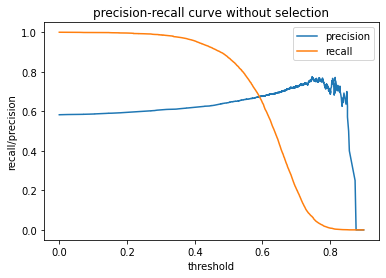

In [51]:
#menyimpan nilai probabilitas kasus positif predicted untuk X_train_selected dan X_train_transformed
y_train_transformed_pred = logreg_final.predict_proba(X_train_transformed)[:,1]

# precision-recall curve
precision_tr, recall_tr, thre_prc_tr = precision_recall_curve(y_train, y_train_transformed_pred)

sns.lineplot(x = thre_prc_tr, y=precision_tr[:-1], label='precision')
sns.lineplot(x = thre_prc_tr, y=recall_tr[:-1], label='recall')
plt.xlabel('threshold')
plt.ylabel('recall/precision')
plt.title('precision-recall curve without selection')
plt.show()

In [52]:
def classif_lr(x, y, estimator, th):
    y_pred = estimator.predict_proba(x)[:,1] > th
    print(classification_report(y, y_pred, labels = [1,0]))

In [53]:
classif_lr(X_train_transformed, y_train, logreg_final, 0.6)

              precision    recall  f1-score   support

           1       0.68      0.64      0.66      6359
           0       0.53      0.57      0.55      4557

    accuracy                           0.61     10916
   macro avg       0.60      0.61      0.61     10916
weighted avg       0.62      0.61      0.61     10916



In [54]:
classif_lr(X_test_transformed, y_test, logreg_final, 0.6)

              precision    recall  f1-score   support

           1       0.66      0.61      0.63      1590
           0       0.50      0.56      0.53      1139

    accuracy                           0.59      2729
   macro avg       0.58      0.58      0.58      2729
weighted avg       0.59      0.59      0.59      2729



#### Logistic Regression dengan Feature Selection

In [55]:
#menyiapkan dictionary yang berisi argumen untuk parameter yang akan dituning
params_grid = {'penalty':['l1', 'l2', 'none'], 'C':[0.5, 1, 2]}
#menyiapkan model logistic regression
logreg = LogisticRegression(random_state=42, solver='saga')
#menyiapkan fungsi grid search cross validation
gscv_selected = GridSearchCV(logreg, param_grid=params_grid, cv=5, return_train_score=False)

In [56]:
gscv_selected.fit(X_train_selected, y_train)

c:\Users\Rahman Aziz F\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
c:\Users\Rahman Aziz F\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
c:\Users\Rahman Aziz F\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
c:\Users\Rahman Aziz F\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
c:\Users\Rahman Aziz F\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Se

GridSearchCV(cv=5, estimator=LogisticRegression(random_state=42, solver='saga'),
             param_grid={'C': [0.5, 1, 2], 'penalty': ['l1', 'l2', 'none']})

In [57]:
C_mulred, penalty_mulred = gscv_selected.best_params_.values()
logreg_selected = LogisticRegression(C=C_mulred, penalty=penalty_mulred)
logreg_selected.fit(X_train_selected, y_train)

c:\Users\Rahman Aziz F\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
c:\Users\Rahman Aziz F\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=0.5, penalty='none')

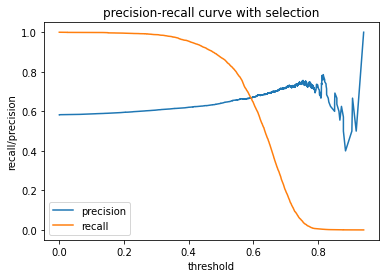

In [58]:
#menyimpan nilai probabilitas kasus positif predicted untuk X_train_selected dan X_train_transformed
y_train_sel_pred = logreg_selected.predict_proba(X_train_selected)[:,1]

# precision-recall curve
precision_sel, recall_sel, thre_prc_sel = precision_recall_curve(y_train, y_train_sel_pred)

sns.lineplot(x = thre_prc_sel, y=precision_sel[:-1], label='precision')
sns.lineplot(x = thre_prc_sel, y=recall_sel[:-1], label='recall')
plt.xlabel('threshold')
plt.ylabel('recall/precision')
plt.title('precision-recall curve with selection')
plt.show()

In [59]:
classif_lr(X_train_selected, y_train, logreg_selected, 0.6)

              precision    recall  f1-score   support

           1       0.67      0.64      0.66      6359
           0       0.53      0.56      0.55      4557

    accuracy                           0.61     10916
   macro avg       0.60      0.60      0.60     10916
weighted avg       0.61      0.61      0.61     10916



In [60]:
classif_lr(X_test_selected, y_test, logreg_selected, 0.6)

              precision    recall  f1-score   support

           1       0.65      0.61      0.63      1590
           0       0.50      0.55      0.52      1139

    accuracy                           0.59      2729
   macro avg       0.58      0.58      0.58      2729
weighted avg       0.59      0.59      0.59      2729



model dengan atau tanpa seleksi memiliki performa yang relatif sama

## Back-testing

In [61]:
backtest = pd.read_csv('backtest.csv')
backtest.head()

,Unnamed: 0,customer_city,customer_state,geolocation_city,geolocation_state,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,...,payment_value,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,delivered_est_difference,delivered_purchase_difference
0,0,other,SP,other,SP,delivered,2017-12-03 15:57:22,2017-12-05 04:12:10,2017-12-06 18:58:57,2017-12-15 22:47:41,...,1078.43,63.0,3893.0,1.0,1250.0,26.0,6.0,26.0,11.0,12.0
1,1,other,other,other,other,delivered,2017-04-04 21:00:40,2017-04-04 21:10:17,2017-04-05 13:34:53,2017-04-11 17:10:33,...,123.45,38.0,1460.0,1.0,1700.0,17.0,29.0,22.0,21.0,6.0
2,2,sao paulo,SP,other,SP,delivered,2017-05-31 19:59:58,2017-05-31 20:10:17,2017-06-01 14:48:51,2017-06-06 07:16:47,...,48.75,59.0,359.0,4.0,900.0,31.0,13.0,26.0,14.0,5.0
3,3,other,RJ,other,RJ,delivered,2017-12-14 21:35:29,2017-12-14 21:50:26,2017-12-16 03:53:07,2018-01-05 18:22:47,...,188.65,57.0,1620.0,1.0,2350.0,16.0,40.0,16.0,6.0,21.0
4,4,rio de janeiro,RJ,rio de janeiro,RJ,delivered,2018-01-26 13:31:18,2018-01-29 12:52:07,2018-01-30 19:56:25,2018-02-08 19:38:58,...,206.92,59.0,1088.0,2.0,292.0,17.0,8.0,12.0,13.0,13.0


In [62]:
backtest_dropped = backtest[X.columns]
backtest_dropped.head()

,customer_city,customer_state,geolocation_city,geolocation_state,payment_type,product_category_name,seller_city,seller_state,product_category_name_english,geolocation_lat,...,payment_value,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,delivered_est_difference,delivered_purchase_difference
0,other,SP,other,SP,boleto,other,other,SP,other,-21.782432,...,1078.43,63.0,3893.0,1.0,1250.0,26.0,6.0,26.0,11.0,12.0
1,other,other,other,other,credit_card,esporte_lazer,other,SP,sports_leisure,-20.279932,...,123.45,38.0,1460.0,1.0,1700.0,17.0,29.0,22.0,21.0,6.0
2,sao paulo,SP,other,SP,credit_card,informatica_acessorios,sao jose do rio preto,SP,computers_accessories,-23.641973,...,48.75,59.0,359.0,4.0,900.0,31.0,13.0,26.0,14.0,5.0
3,other,RJ,other,RJ,credit_card,other,sao paulo,SP,other,-21.534098,...,188.65,57.0,1620.0,1.0,2350.0,16.0,40.0,16.0,6.0,21.0
4,rio de janeiro,RJ,rio de janeiro,RJ,credit_card,other,other,SP,other,-22.925192,...,206.92,59.0,1088.0,2.0,292.0,17.0,8.0,12.0,13.0,13.0


In [63]:
# handling missing value
for column in backtest_dropped.select_dtypes('number').columns:
    backtest_dropped.loc[:, column] = simple_imp_median.fit_transform(backtest_dropped[[column]])
for columns in backtest_dropped.select_dtypes('object').columns:
    backtest_dropped.loc[:, column] = simple_imp_mode.fit_transform(backtest_dropped[[column]])

C:\Users\Rahman Aziz F\AppData\Local\Temp\ipykernel_9540\3125745477.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  backtest_dropped.loc[:, column] = simple_imp_median.fit_transform(backtest_dropped[[column]])
C:\Users\Rahman Aziz F\AppData\Local\Temp\ipykernel_9540\3125745477.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  backtest_dropped.loc[:, column] = simple_imp_median.fit_transform(backtest_dropped[[column]])
C:\Users\Rahman Aziz F\AppData\Local\Temp\ipykernel_9540\3125745477.py:3: SettingWit

In [64]:
backtest_dropped.isna().sum()

customer_city                    0
customer_state                   0
geolocation_city                 0
geolocation_state                0
payment_type                     0
product_category_name            0
seller_city                      0
seller_state                     0
product_category_name_english    0
geolocation_lat                  0
geolocation_lng                  0
price                            0
freight_value                    0
payment_sequential               0
payment_installments             0
payment_value                    0
product_name_lenght              0
product_description_lenght       0
product_photos_qty               0
product_weight_g                 0
product_length_cm                0
product_height_cm                0
product_width_cm                 0
delivered_est_difference         0
delivered_purchase_difference    0
dtype: int64

In [65]:
# memisahkan fitur numerik dan kategorik
backtest_num = backtest_dropped.select_dtypes('number')
backtest_obj = backtest_dropped.select_dtypes('object')

In [66]:
# scaling
backtest_num_scaled = pd.DataFrame(minmax.transform(backtest_num), columns=minmax.feature_names_in_)
backtest_num_scaled.head()

,geolocation_lat,geolocation_lng,price,freight_value,payment_sequential,payment_installments,payment_value,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,delivered_est_difference,delivered_purchase_difference
0,0.326207,0.596720,0.220268,0.054439,0.0,0.000000,0.148239,0.983051,0.976155,0.000000,0.030874,0.193878,0.038835,0.202020,0.725000,0.064171
1,0.367366,0.834616,0.022052,0.043834,0.0,0.000000,0.016968,0.559322,0.365462,0.000000,0.042006,0.102041,0.262136,0.161616,0.766667,0.032086
2,0.275268,0.642735,0.007441,0.031576,0.0,0.086957,0.006700,0.915254,0.089106,0.176471,0.022215,0.244898,0.106796,0.202020,0.737500,0.026738
3,0.333010,0.777348,0.034555,0.057717,0.0,0.391304,0.025930,0.881356,0.405622,0.000000,0.058086,0.091837,0.368932,0.101010,0.704167,0.112299
4,0.294903,0.746251,0.039524,0.042875,0.0,0.304348,0.028442,0.915254,0.272088,0.058824,0.007174,0.102041,0.058252,0.060606,0.733333,0.069519


In [67]:
# encoding
backtest_obj_encoded = pd.DataFrame(ohe.transform(backtest_obj).toarray(), columns=ohe.get_feature_names_out(backtest_obj.columns))
backtest_obj_encoded.head()

,customer_city_belo horizonte,customer_city_curitiba,customer_city_niteroi,customer_city_other,customer_city_rio de janeiro,customer_city_sao paulo,customer_state_MG,customer_state_PR,customer_state_RJ,customer_state_RS,...,seller_state_RJ,seller_state_SC,seller_state_SP,seller_state_other,product_category_name_english_bed_bath_table,product_category_name_english_computers_accessories,product_category_name_english_furniture_decor,product_category_name_english_health_beauty,product_category_name_english_other,product_category_name_english_sports_leisure
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [68]:
# menggabungkan kembali fitur numerik dan kategorik
backtest_transformed = pd.concat([backtest_num_scaled, backtest_obj_encoded], axis=1)
backtest_transformed.head()

,geolocation_lat,geolocation_lng,price,freight_value,payment_sequential,payment_installments,payment_value,product_name_lenght,product_description_lenght,product_photos_qty,...,seller_state_RJ,seller_state_SC,seller_state_SP,seller_state_other,product_category_name_english_bed_bath_table,product_category_name_english_computers_accessories,product_category_name_english_furniture_decor,product_category_name_english_health_beauty,product_category_name_english_other,product_category_name_english_sports_leisure
0,0.326207,0.596720,0.220268,0.054439,0.0,0.000000,0.148239,0.983051,0.976155,0.000000,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.367366,0.834616,0.022052,0.043834,0.0,0.000000,0.016968,0.559322,0.365462,0.000000,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.275268,0.642735,0.007441,0.031576,0.0,0.086957,0.006700,0.915254,0.089106,0.176471,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.333010,0.777348,0.034555,0.057717,0.0,0.391304,0.025930,0.881356,0.405622,0.000000,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.294903,0.746251,0.039524,0.042875,0.0,0.304348,0.028442,0.915254,0.272088,0.058824,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [69]:
y_pred = np.where(logreg_final.predict_proba(backtest_transformed)[:,1] > 0.6, 1, 0)

In [73]:
label_prediction = pd.DataFrame({'label': y_pred})
label_prediction.to_csv('label_prediction.csv')

In [74]:
label_prediction.head()

,label
0,1
1,1
2,1
3,0
4,1
